<a href="https://colab.research.google.com/github/Dudukrop/Undersapling_Oversapling_PCA/blob/main/Undersapling_Oversapling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tratamento de dados**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
base_census = pd.read_csv('census.csv')
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


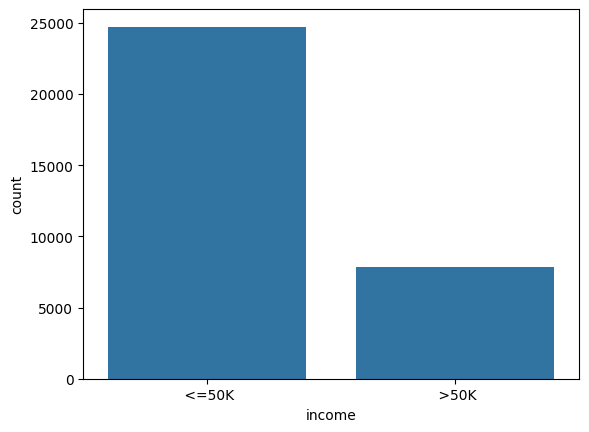

In [ ]:
sns.countplot(x='income', data=base_census);

In [ ]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [ ]:
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_census[:, 1] = label_encoder.fit_transform(X_census[:, 1])
X_census[:, 3] = label_encoder.fit_transform(X_census[:, 3])
X_census[:, 5] = label_encoder.fit_transform(X_census[:, 5])
X_census[:, 6] = label_encoder.fit_transform(X_census[:, 6])
X_census[:, 7] = label_encoder.fit_transform(X_census[:, 7])
X_census[:, 8] = label_encoder.fit_transform(X_census[:, 8])
X_census[:, 9] = label_encoder.fit_transform(X_census[:, 9])
X_census[:, 13] = label_encoder.fit_transform(X_census[:, 13])
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

# **Undersapling**

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X_census, y_census)

In [ ]:
X_under.shape, y_under.shape, X_census.shape, y_census.shape

((30160, 14), (30160,), (32561, 14), (32561,))

In [ ]:
np.unique(y_under, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([22319,  7841]))

In [ ]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
X_census_final = encoder.fit_transform(X_under).toarray()
X_census_final

array([[    0.,     0.,     0., ...,  2174.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    20.],
       [    0.,     0.,     0., ..., 15024.,     0.,    40.]])

In [ ]:
X_census_final.shape

(30160, 108)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_census_final, y_under, test_size=0.25, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_leaf=1, min_samples_split=5)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
from sklearn.metrics import accuracy_score
previsoes = random_forest.predict(X_test)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_test, previsoes)

0.8567639257294429

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      5567
        >50K       0.76      0.67      0.71      1973

    accuracy                           0.86      7540
   macro avg       0.82      0.80      0.81      7540
weighted avg       0.85      0.86      0.85      7540



# **Oversapling**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_census, y_census)

In [ ]:
X_over.shape, y_over.shape, X_census.shape, y_census.shape

((49440, 14), (49440,), (32561, 14), (32561,))

In [ ]:
np.unique(y_over, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720]))

In [ ]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_leaf=1, min_samples_split=5)

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
previsoes = random_forest.predict(X_test)
previsoes

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype=object)

In [ ]:
accuracy_score(y_test, previsoes)

0.905663430420712

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.91      6234
        >50K       0.92      0.89      0.90      6126

    accuracy                           0.91     12360
   macro avg       0.91      0.91      0.91     12360
weighted avg       0.91      0.91      0.91     12360



# **PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=8)

In [ ]:
X_census_treinamento_pca = pca.fit_transform(X_train)
X_census_teste_pca = pca.transform(X_test)